# USED CAR PRICE PRIDICTOR

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [2]:
# S3 bucket and file details
file_path = 'car data.csv'

# Read CSV directly into pandas
df = pd.read_csv(file_path)

In [4]:
## to find the first five rows of our dataframe
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
# to check for any missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
# check datatypes for conversion
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


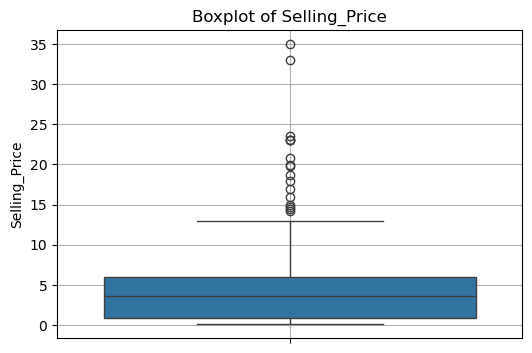

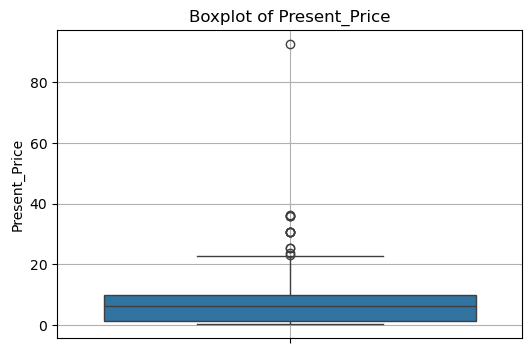

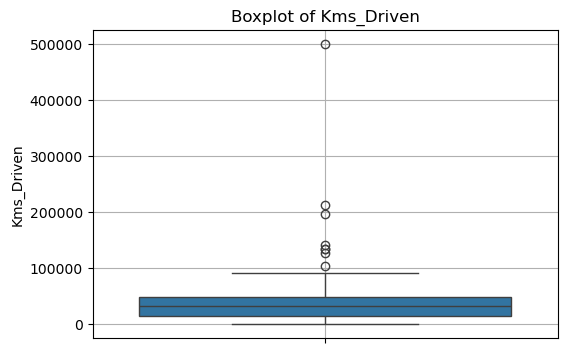

In [8]:
# Boxplot for numerical columns
features = ['Selling_Price', 'Present_Price', 'Kms_Driven']

for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

## Correlation Heat Map

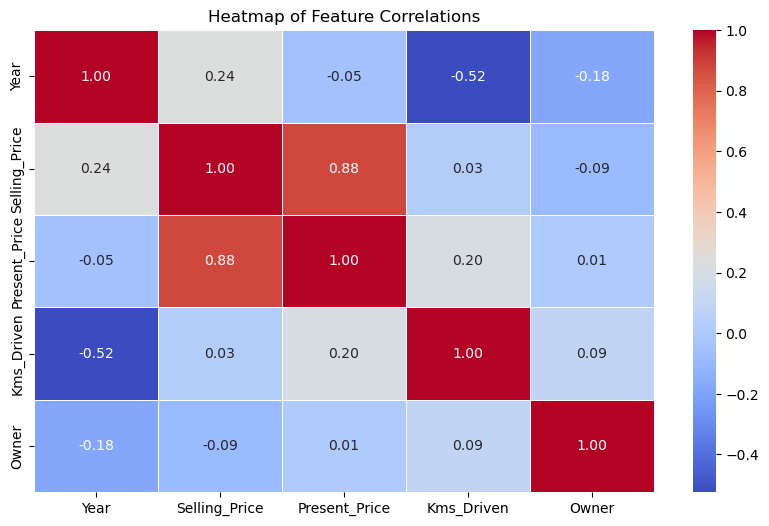

In [9]:
# Calculate the correlation matrix
corr = df.corr(numeric_only=True)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

In [14]:
# Data Cleaning : Dropping unnecessary Columns
inputs = df.drop(['Car_Name'],axis='columns')
target = df.Selling_Price

In [15]:
# Converting string data types to Numeric data type
from sklearn.preprocessing import LabelEncoder
Numerics=LabelEncoder()

In [16]:
# New Encoded Values
inputs["Fuel_Type_n"] = Numerics.fit_transform(inputs["Fuel_Type"])
inputs["Transmission_Type_n"] = Numerics.fit_transform(inputs["Transmission"])
inputs["Seller_Type_n"] = Numerics.fit_transform(inputs["Seller_Type"])
inputs

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_n,Transmission_Type_n,Seller_Type_n
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2,1,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,1,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2,1,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2,1,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,1,1,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2,1,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2,1,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1,1,0


In [17]:
inputs_n = inputs.drop(["Fuel_Type", "Transmission", "Selling_Price", "Seller_Type"], axis = 'columns')
inputs_n

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_n,Transmission_Type_n,Seller_Type_n
0,2014,5.59,27000,0,2,1,0
1,2013,9.54,43000,0,1,1,0
2,2017,9.85,6900,0,2,1,0
3,2011,4.15,5200,0,2,1,0
4,2014,6.87,42450,0,1,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,1,1,0
297,2015,5.90,60000,0,2,1,0
298,2009,11.00,87934,0,2,1,0
299,2017,12.50,9000,0,1,1,0


# Linear Regression

In [18]:
# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2, random_state=42)

# Step 2: Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 5: Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Step 6: Calculate Adjusted R-squared
n = X_test.shape[0]   # number of observations
p = X_test.shape[1]   # number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Step 7: Print results
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: 0.8468053957657425
Adjusted R-squared: 0.8265721461498972
Mean Squared Error (MSE): 3.5289272538906515
Root Mean Squared Error (RMSE): 1.878543918541872


## Feature Importance

In [13]:
# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Define features and target
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_scaled, y)

# Get feature importance (coefficients)
importance = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print(importance)

Present_Price    3.851394
Year             1.163359
Fuel_Type       -0.639761
Seller_Type     -0.572204
Transmission    -0.485371
Kms_Driven      -0.251216
Owner           -0.167387
Car_Name        -0.057316
dtype: float64


# Prediction (Actual vs Predicted)

In [19]:
# Example new car data
new_car = pd.DataFrame([{
    'Year': 2016,
    'Present_Price': 13.6,
    'Kms_Driven': 10980,
    'Owner': 0,
    'Fuel_Type_n': 2,
    'Transmission_Type_n': 1,
    'Seller_Type_n': 0
}])

# Scale using same scaler
new_car_scaled = scaler.transform(new_car)

# Predict
predicted_price = model.predict(new_car_scaled)
print("Predicted Selling Price:", predicted_price[0])

Predicted Selling Price: 8.3025584013768


In [20]:
print(X_test.head())

     Year  Present_Price  Kms_Driven  Owner  Fuel_Type_n  Transmission_Type_n  \
177  2016           0.57       24000      0            2                    0   
289  2016          13.60       10980      0            2                    1   
228  2012           9.40       60000      0            1                    1   
198  2011           0.57       35000      1            2                    1   
60   2013          18.61       40001      0            2                    1   

     Seller_Type_n  
177              1  
289              0  
228              0  
198              1  
60               0  


In [21]:
print(y_test.head())

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
Name: Selling_Price, dtype: float64


# Plot

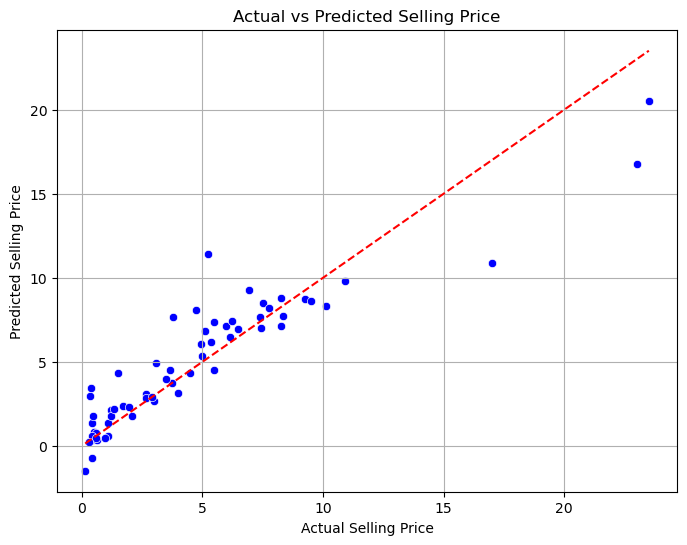

In [22]:
# Create a DataFrame for comparison
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, color='blue')
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid(True)
plt.show()

## Lasso Regression

In [30]:
# Step 4: Fit Lasso Regression
lasso = Lasso(alpha=0.1)  # You can tune alpha
lasso.fit(X_train_scaled, y_train)

# Step 5: Predict and evaluate
y_pred = lasso.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
n, p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R²:", r2)
print("Adjusted R²:", adjusted_r2)
print("MSE:", mse)
print("RMSE:", rmse)

R²: 0.8408234287058183
Adjusted R²: 0.8198001079688508
MSE: 3.6667253616971305
RMSE: 1.9148695416913213


## Hyperparameter tuning with GridSearchCV for Lasso

In [31]:
# Create the Lasso model
lasso = Lasso(max_iter=10000)

# Define the grid of alpha values
param_grid = {'alpha': np.logspace(-4, 1, 50)}

# Grid search with 5-fold CV
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Evaluate
best_lasso = grid_search.best_estimator_
y_pred = best_lasso.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
n, p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Best alpha:", grid_search.best_params_['alpha'])
print("R²:", r2)
print("Adjusted R²:", adjusted_r2)
print("MSE:", mse)
print("RMSE:", rmse)

Best alpha: 0.09102981779915217
R²: 0.8414917764275669
Adjusted R²: 0.8205567280312078
MSE: 3.651329581263846
RMSE: 1.9108452530918996


## Ridge Regression

In [32]:
# Step 1: Fit Ridge Regression
ridge = Ridge(alpha=1.0)  # You can tune alpha too
ridge.fit(X_train_scaled, y_train)

# Step 2: Predict and evaluate
y_pred = ridge.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

n, p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Step 3: Print results
print("R²:", r2)
print("Adjusted R²:", adjusted_r2)
print("MSE:", mse)
print("RMSE:", rmse)

R²: 0.8462917558628497
Adjusted R²: 0.8259906670145468
MSE: 3.540759249286734
RMSE: 1.8816905296266795


## Hyperparameter Tuning with GridSearchCV for Ridge

In [33]:
# Step 1: Create Ridge model
ridge = Ridge(max_iter=10000)

# Step 2: Define grid of alpha values
param_grid = {'alpha': np.logspace(-4, 1, 50)}  # from 0.0001 to 10

# Step 3: Grid search with 5-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Step 4: Evaluate best model
best_ridge = grid_search.best_estimator_
y_pred = best_ridge.predict(X_test_scaled)

# Step 5: Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

n, p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Step 6: Output
print("Best alpha:", grid_search.best_params_['alpha'])
print("R²:", r2)
print("Adjusted R²:", adjusted_r2)
print("MSE:", mse)
print("RMSE:", rmse)

Best alpha: 10.0
R²: 0.8413246792434115
Adjusted R²: 0.8203675614076357
MSE: 3.6551787625725614
RMSE: 1.9118521811511897


## Comparison between Linear, Lasso and Ridge Regression

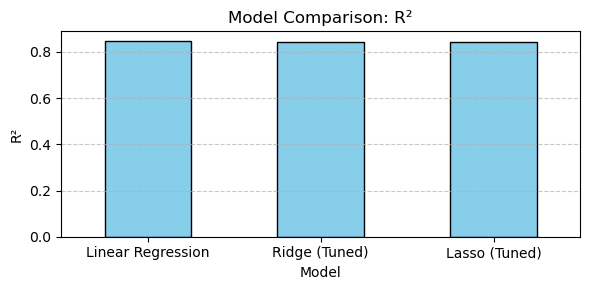

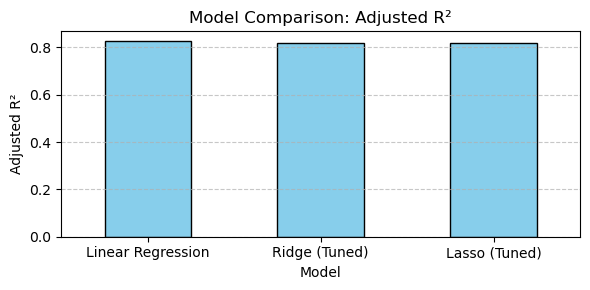

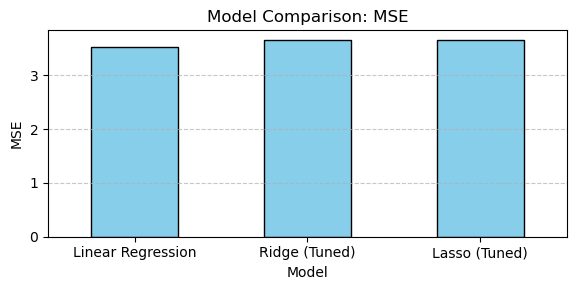

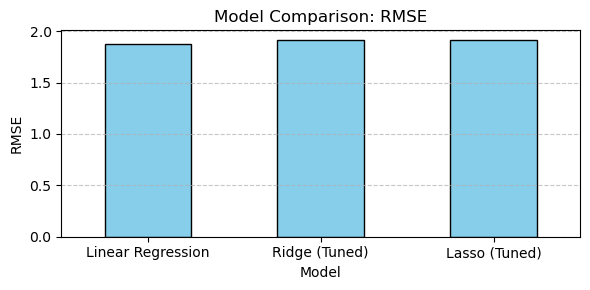

In [34]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge (Tuned)', 'Lasso (Tuned)'],
    'R²': [0.846805, 0.841325, 0.841492],
    'Adjusted R²': [0.82657, 0.82037, 0.82056],
    'MSE': [3.52893, 3.65518, 3.65133],
    'RMSE': [1.87854, 1.91185, 1.91084]
})

# Set the model names as index
results.set_index('Model', inplace=True)

# Plot each metric
metrics = ['R²', 'Adjusted R²', 'MSE', 'RMSE']

for metric in metrics:
    plt.figure(figsize=(6, 3))
    results[metric].plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Model Comparison: {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [35]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge (Tuned)', 'Lasso (Tuned)'],
    'R²': [0.846805, 0.841325, 0.841492],
    'Adjusted R²': [0.82657, 0.82037, 0.82056],
    'MSE': [3.52893, 3.65518, 3.65133],
    'RMSE': [1.87854, 1.91185, 1.91084]
})

results.set_index('Model', inplace=True)
display(results)

,R²,Adjusted R²,MSE,RMSE
Model,,,,
Linear Regression,0.846805,0.82657,3.52893,1.87854
Ridge (Tuned),0.841325,0.82037,3.65518,1.91185
Lasso (Tuned),0.841492,0.82056,3.65133,1.91084
